# Proyecto Final - Introduccion a la ciencia de datos
* Alejandro Marin Hoyos
* Manuel Antonio Vidales
* Yessica Fernanda Villa  
### 2. Limpieza y Normalización de Datos

In [1]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Valores nulos antes:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Precisión comparativa:
                 Random Forest       SVM
Original             0.993182  0.961364
StandardScaler       0.993182  0.968182
MinMaxScaler         0.993182  0.968182
RobustScaler         0.993182  0.970455


<Figure size 1200x600 with 0 Axes>

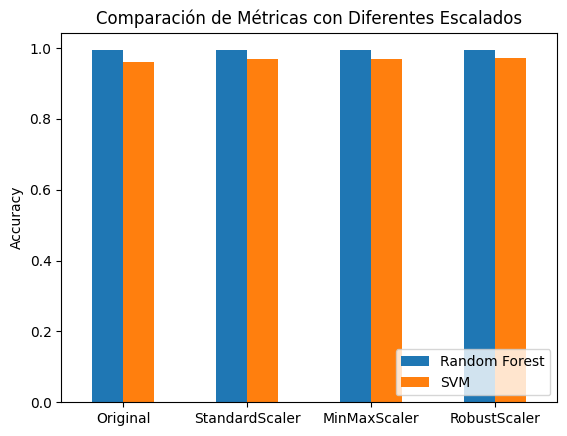

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Cargar datos (asumiendo que ya está cargado como df)
df = pd.read_csv('../data/Crop_recommendation.csv')

# 1. Verificación e imputación de nulos 
print("Valores nulos antes:\n", df.isnull().sum())

imputer = SimpleImputer(strategy='median')  # Para variables numéricas
df[['N','P','K','temperature','humidity','ph','rainfall']] = imputer.fit_transform(
    df[['N','P','K','temperature','humidity','ph','rainfall']]
)

# Codificar la variable objetivo
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# Dividir datos
X = df.drop(['label', 'label_encoded'], axis=1)
y = df['label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Aplicar diferentes técnicas de escalado
scalers = {
    'Original': None,
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

results = {}

for name, scaler in scalers.items():
    # Copiar los datos para no modificar el original
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    
    if scaler is not None:
        X_train_scaled = scaler.fit_transform(X_train_scaled)
        X_test_scaled = scaler.transform(X_test_scaled)
    
    # Entrenar Random Forest (no necesita normalización)
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train_scaled, y_train)
    rf_acc = accuracy_score(y_test, rf.predict(X_test_scaled))
    
    # Entrenar SVM (sensible a la escala)
    svm = SVC(random_state=42)
    svm.fit(X_train_scaled, y_train)
    svm_acc = accuracy_score(y_test, svm.predict(X_test_scaled))
    
    results[name] = {
        'Random Forest': rf_acc,
        'SVM': svm_acc
    }

# Mostrar resultados
results_df = pd.DataFrame(results).T
print("\nPrecisión comparativa:\n", results_df)

# Visualización
plt.figure(figsize=(12, 6))
results_df.plot(kind='bar', rot=0)
plt.title('Comparación de Métricas con Diferentes Escalados')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()